In [58]:
import numpy as np
import math
import pandas as pd

### data

In [59]:
com_population_list = [8500, 10832, 9823, 14184]

pop = 8500
com_name_list = ["金山街道金洲社区", "金山街道金环社区"]
clinic_name_list = ["金洲社区卫生服务站"]
clinic_scale_list = [12, 15, 8, 9] # cure n people per day
clinic_scale = 8

recover_time = 7
severe_percent = 0.1
sigmoid_b = 4.6
slow_scale = 0.25

max_sim = 100
date_list = list(range(0,max_sim,1))


### basic functions

In [60]:
# multiply population
# output [0,1]
def sigmoidFunction(z, sigmoid_b, slow_scale):
    fz = []
    for num in z:
        fz.append(1/(1 + math.exp(-(num * slow_scale) + sigmoid_b)))
    return fz

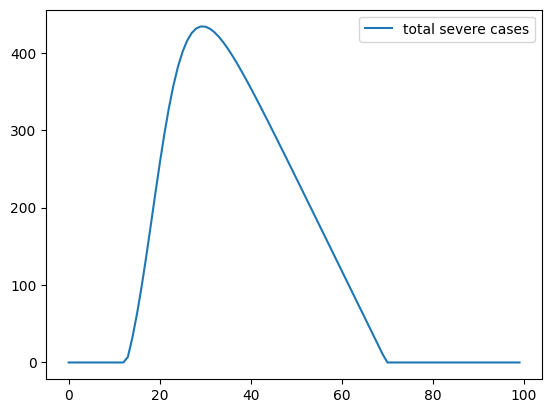

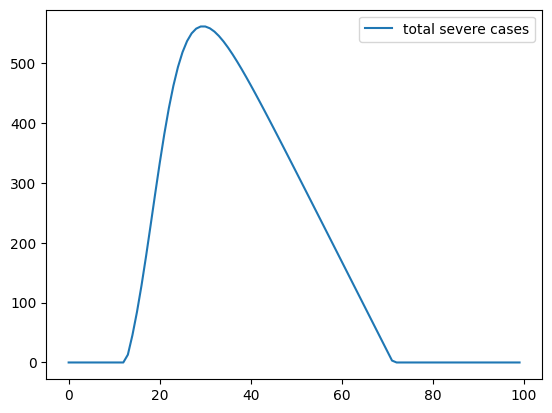

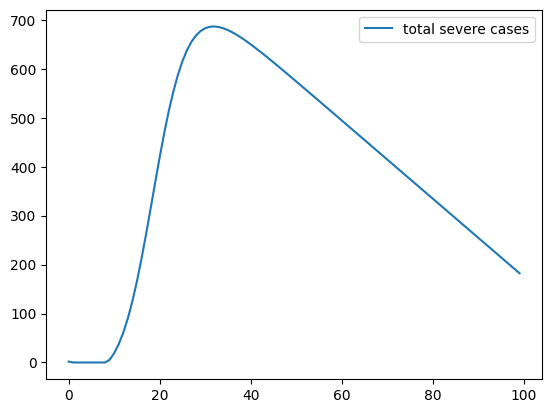

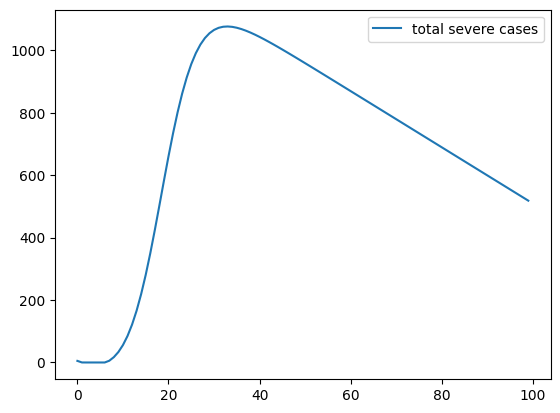

In [90]:
total_severe_day_list = [[],[],[],[]]
total_severe_pop = [0,0,0,0]
total_severe_day_arr = np.zeros((4, len(date_list)))
for day in date_list:
    for i in range(4):
        infected_day_arr = np.asarray(
            sigmoidFunction(date_list, sigmoid_b,
                        slow_scale)) * np.array(com_population_list[i])
        new_infected_list = np.diff(np.insert(infected_day_arr, 0, 0))

        # severe cases
        new_infected_arr = np.asarray(new_infected_list)
        new_severe_arr = new_infected_arr * severe_percent

        total_severe_pop[i] = total_severe_pop[i] + new_severe_arr[day] - clinic_scale_list[i]
        total_severe_day_list[i].append(total_severe_pop[i])
        clipped = np.clip(np.asarray(total_severe_day_list[i]),0,com_population_list[i])
        total_severe_day_arr[i, day] = np.clip(np.asarray(total_severe_day_list[i][day]),0,com_population_list[i])

for i in range(4):
    df = pd.DataFrame({'total severe cases': total_severe_day_arr[i]})
    df.plot()

In [69]:
np.insert(np.array([1,2,3]), 0, 0)

array([0, 1, 2, 3])

In [ ]:
df

,total severe cases
0,5.115636
1,0.073748
2,0.000000
3,0.000000
4,0.000000
...,...
95,554.399993
96,545.399995
97,536.399996
98,527.399997


### code

In [ ]:
infected_day_arr = np.asarray(sigmoidFunction(date_list, sigmoid_b, slow_scale)) * pop
infected_day_arr

array([  84.59031587,  108.30997044,  138.57124466,  177.10892841,
        226.0744454 ,  288.10889535,  366.411667  ,  464.79119634,
        587.67657292,  740.05906574,  927.32298016, 1154.91962458,
       1427.84372636, 1749.89816031, 2122.78910244, 2545.17928897,
       3011.92139708, 3513.7505792 , 4037.67690643, 4568.15368542,
       5088.84511096, 5584.58893272, 6043.07077231, 6455.84279407,
       6818.56305275, 7130.5739286 , 7394.07796791, 7613.18460349,
       7793.0320798 , 7939.09341932, 8056.69471383, 8150.7241353 ,
       8225.48855006, 8284.67202257, 8331.35740126, 8368.08206908,
       8396.90830263, 8419.49612955, 8437.17189857, 8450.98929275,
       8461.78167813, 8470.20590863, 8476.77833351, 8481.90401241,
       8485.90019082, 8489.0150269 , 8491.44244803, 8493.3338873 ,
       8494.80752544, 8495.95555024, 8496.8498478 , 8497.54645787,
       8498.08905745, 8498.51168244, 8498.84085222, 8499.09722757,
       8499.29690361, 8499.45241796, 8499.5735366 , 8499.66786

In [ ]:
# difference
new_infected_list = [infected_day_arr[0]]
for index in range(1, len(infected_day_arr)):
    new_infected = infected_day_arr[index] - infected_day_arr[index-1]
    new_infected_list.append(new_infected)
    #print(new_infected_list)

In [ ]:
# severe cases
new_infected_arr = np.asarray(new_infected_list)
new_severe_arr = new_infected_arr * severe_percent

In [ ]:
# new_severe_day_list = []
# for day in date_list:
#     new_severe_day_list.append(new_severe_arr[day] - clinic_scale) ###

# new_severe_day_arr = np.clip(np.asarray(new_severe_day_list),0,pop)

total_severe_day_list = []
total_severe_pop = 0
for day in date_list:
    total_severe_pop = total_severe_pop + new_severe_arr[day] - clinic_scale
    total_severe_day_list.append(total_severe_pop)

total_severe_day_arr = np.clip(np.asarray(total_severe_day_list),0,pop)

<AxesSubplot:>

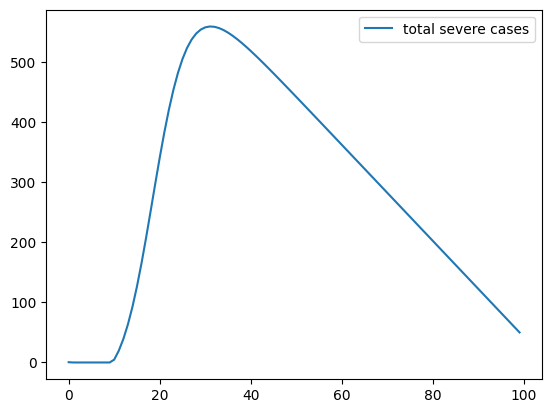

In [ ]:
# total_severe_day_arr
df = pd.DataFrame({'total severe cases': total_severe_day_arr})
df.plot()